In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from kaggle.api.kaggle_api_extended import KaggleApi

import warnings

In [2]:
# Игнорирование предупреждений
warnings.filterwarnings('ignore')

In [3]:
root_dir = os.getcwd()

kaggle_data_set = 'arjunbhasin2013/ccdata'
dataset_dir = 'dataset'
dataset_name = 'CC GENERAL.csv'
dataset_path = os.path.join(root_dir, dataset_dir, dataset_name)

separator = f'\n\b{"-" * 60}\n\b'

In [4]:
def load_data_csv(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        raise Exception(e)

In [5]:
def load_kaggle_data_set(dataset):
    """
    Загрузка датасета из kaggle.

    Важно: Необходимо предварительно получить API Token.
    Переместите файл kaggle.json в папку ~/.kaggle/ (для Linux и macOS)
    или в C:/Users/<Ваше_имя_пользователя>/.kaggle/ (для Windows).
    Если папка .kaggle не существует, нужно ее создать.
    :param dataset:
    :return:
    """

    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset=dataset,
                               path=f'./{dataset_dir}',
                               force=True,
                               unzip=True)  # Загрузка и распаковка датасета

In [6]:
try:
    if not os.path.exists(dataset_path):
        load_kaggle_data_set(kaggle_data_set)  # Загрузка файла датасета из kaggle если он не загружен
    df = load_data_csv(dataset_path)  # Загрузка файла в датафрейм
except Exception as e:
    raise Exception(f'При выполнении произошла ошибка: {e}')

In [7]:
# Экспорт датасета в Exel если не был создан ранее (для удобства просмотра датасета)
dataset_exel = os.path.join(root_dir, 'dataset.xlsx')
if not os.path.isfile(dataset_exel):
    df.to_excel(dataset_exel, index=False)

In [8]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
#  В дата сете 18 колонок и 8950 записей

In [11]:
# Столбец "CUST_ID" - это id покупателя. Он не нужен, поэтому его удаляю.
df = df.drop(['CUST_ID'], axis=1)

In [12]:
# Проверка попущенных значений
print(df.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [13]:
# Пропущенные значения: MINIMUM_PAYMENTS: 313 пропусков, CREDIT_LIMIT: 1 пропуск
# Заполнение пропущенных значений медианными

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = imputer.fit_transform(df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])


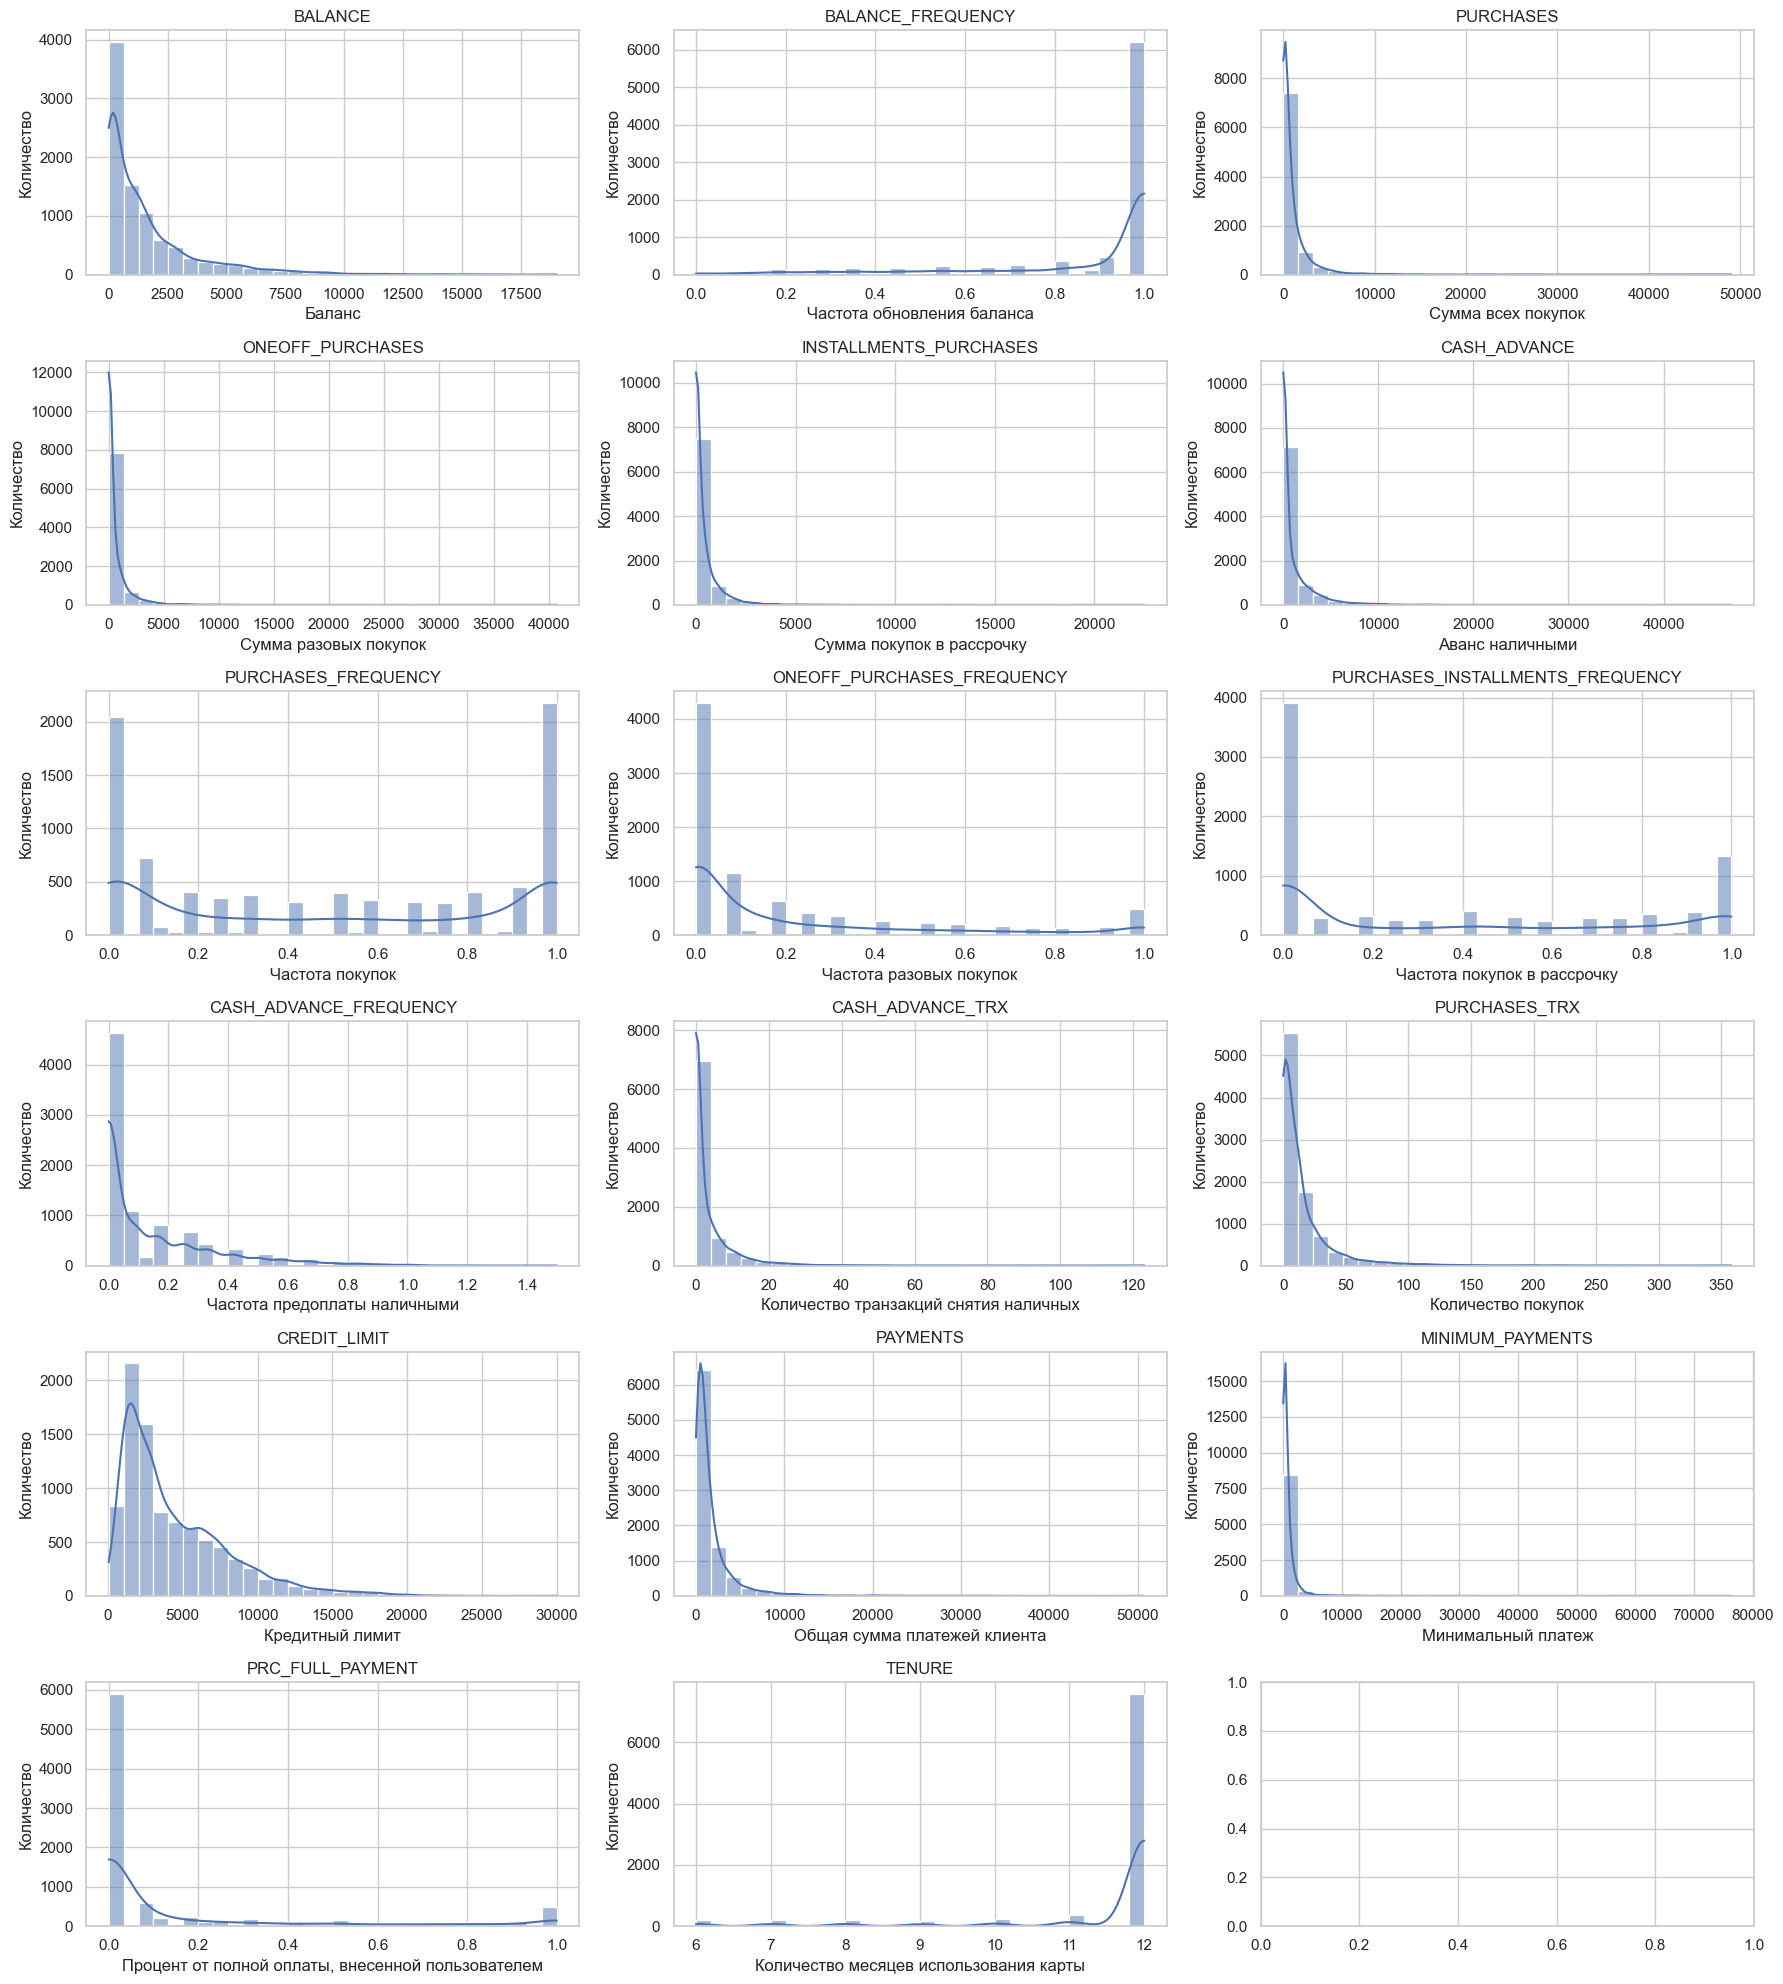

In [14]:
# Посмотрим графики
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

num_cols = df.select_dtypes(include=[np.number])  # Кроме  т.к. он дискретный
num_cols_ru = {'BALANCE':'Баланс',
               'BALANCE_FREQUENCY':'Частота обновления баланса',
               'PURCHASES':'Сумма всех покупок',
               'ONEOFF_PURCHASES':'Сумма разовых покупок',
               'INSTALLMENTS_PURCHASES':'Сумма покупок в рассрочку',
               'CASH_ADVANCE':'Аванс наличными',
               'PURCHASES_FREQUENCY':'Частота покупок',
               'ONEOFF_PURCHASES_FREQUENCY':'Частота разовых покупок',
               'PURCHASES_INSTALLMENTS_FREQUENCY':'Частота покупок в рассрочку',
               'CASH_ADVANCE_FREQUENCY':'Частота предоплаты наличными',
               'CASH_ADVANCE_TRX':'Количество транзакций снятия наличных',
               'PURCHASES_TRX':'Количество покупок',
               'CREDIT_LIMIT':'Кредитный лимит',
               'PAYMENTS':'Общая сумма платежей клиента',
               'MINIMUM_PAYMENTS':'Минимальный платеж',
               'PRC_FULL_PAYMENT':'Процент от полной оплаты, внесенной пользователем',
               'TENURE':'Количество месяцев использования карты'
               }

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(num_cols_ru.get(col))
    axes[i].set_ylabel('Количество')

plt.tight_layout()

In [15]:
# Большинство признаков имеют сильную асимметрию (много нулей, редкие большие значения).
# Например: CASH_ADVANCE, PURCHASES, ONEOFF_PURCHASES — перекошены.
# BALANCE и CREDIT_LIMIT — нормализованы хуже.

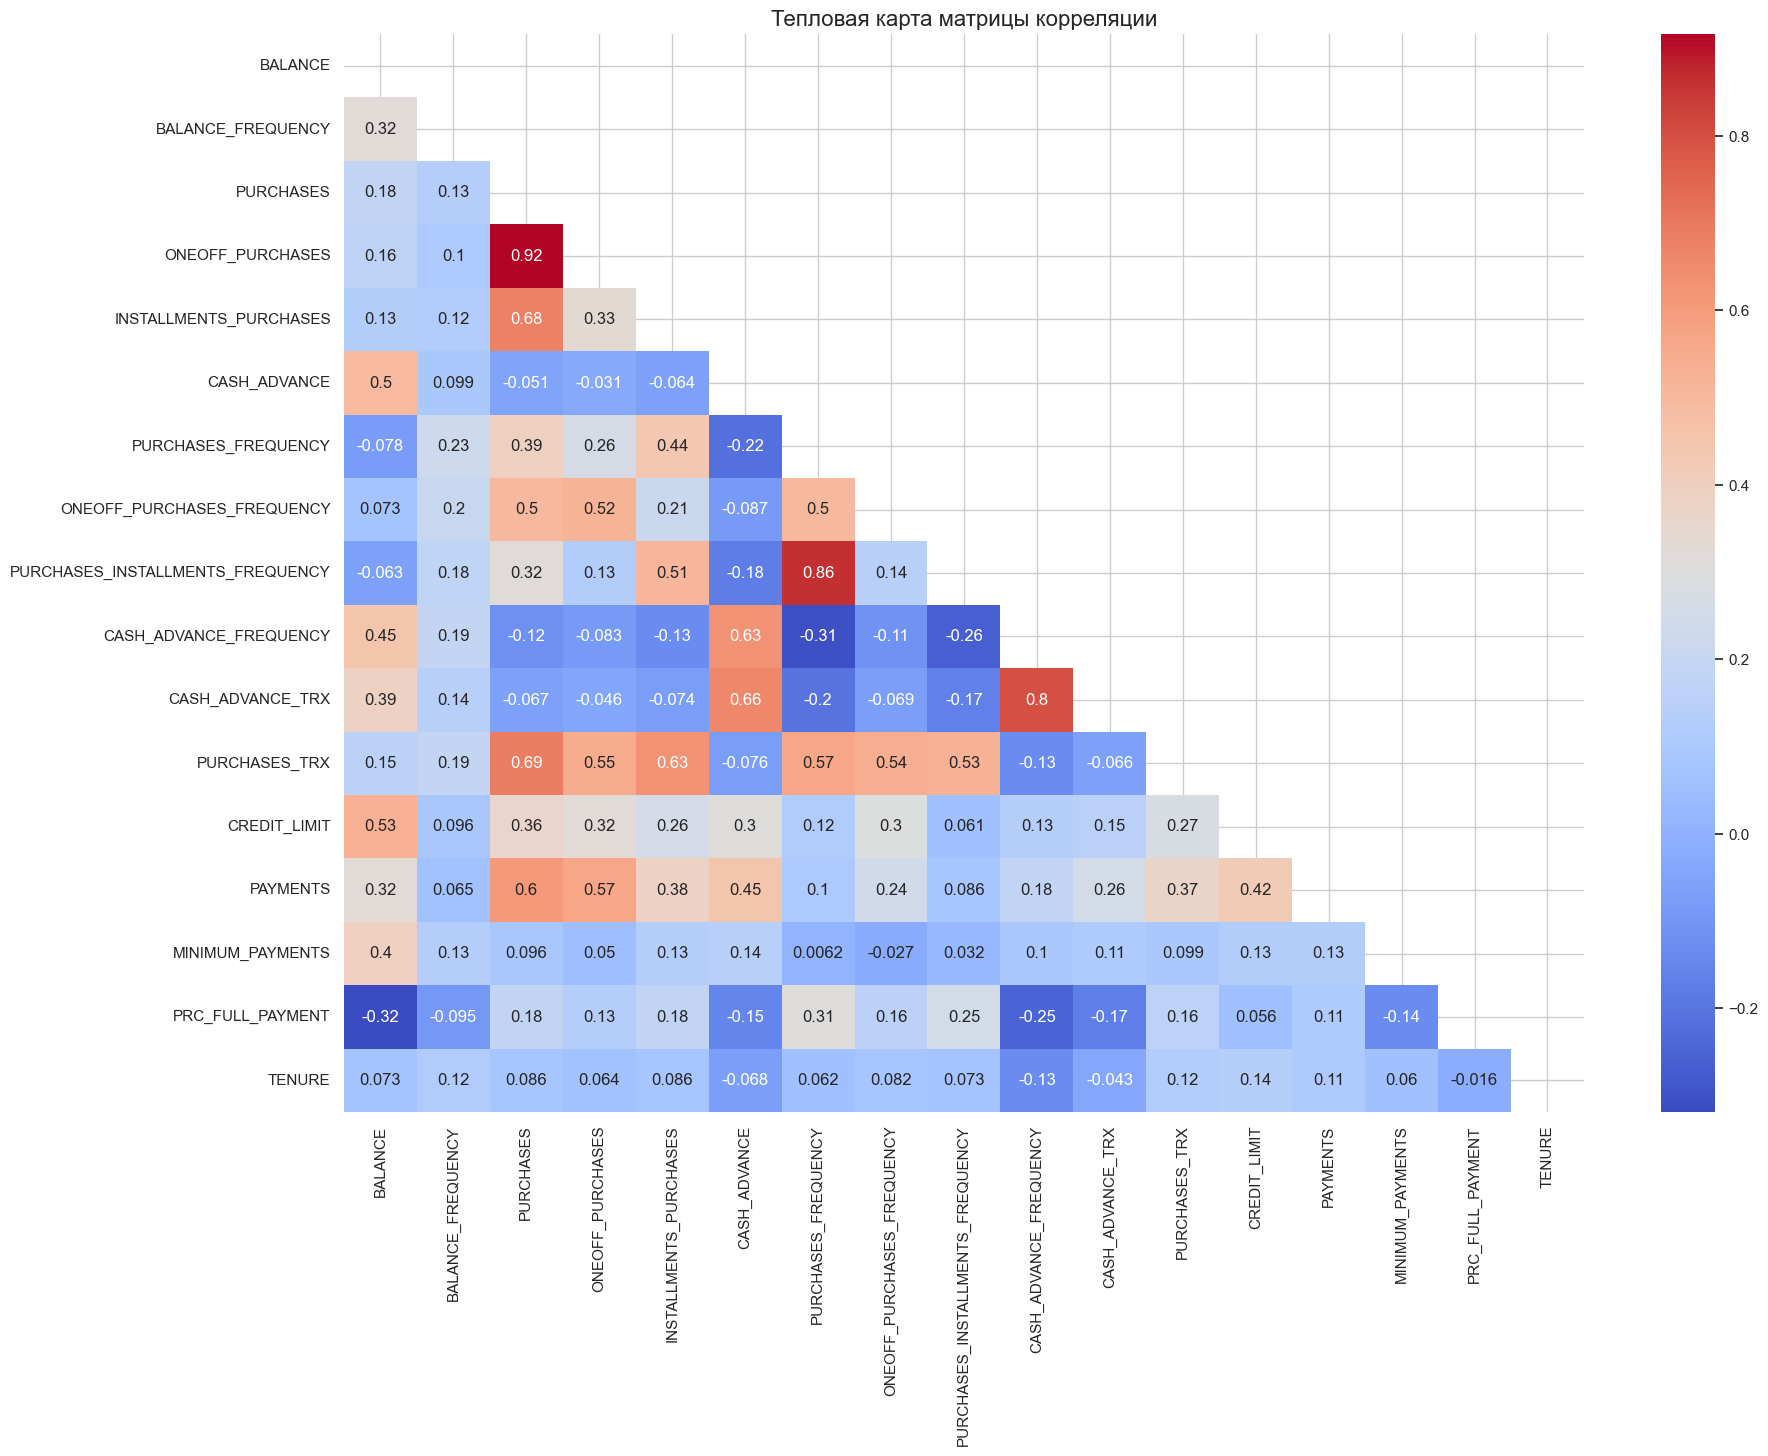

In [16]:
# Посмотрим матрицу корреляции
corr = df.corr()
mask = np.triu(np.ones_like(corr), k=0)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Тепловая карта матрицы корреляции', fontsize=16)
plt.show()

In [17]:
# Матрица корреляции показала наличие отдельных признаков с высокой корреляцией.

In [18]:
# Удалю признаки с высокой корреляцией.

lim_corr_coeff = 0.7  # Предельный коэффициент корреляции для удаления признаков

corr_abs = df.corr().abs()
lower = corr_abs.where(np.tril(np.ones(corr_abs.shape), k=-1).astype(bool))
to_drop = [column for column in lower.columns if any(lower[column] >= lim_corr_coeff)]
df.drop(columns=to_drop, inplace=True)

In [19]:
num_cols = df.select_dtypes(include=[np.number])  # Обновлю список колонок после удаления кореллируших

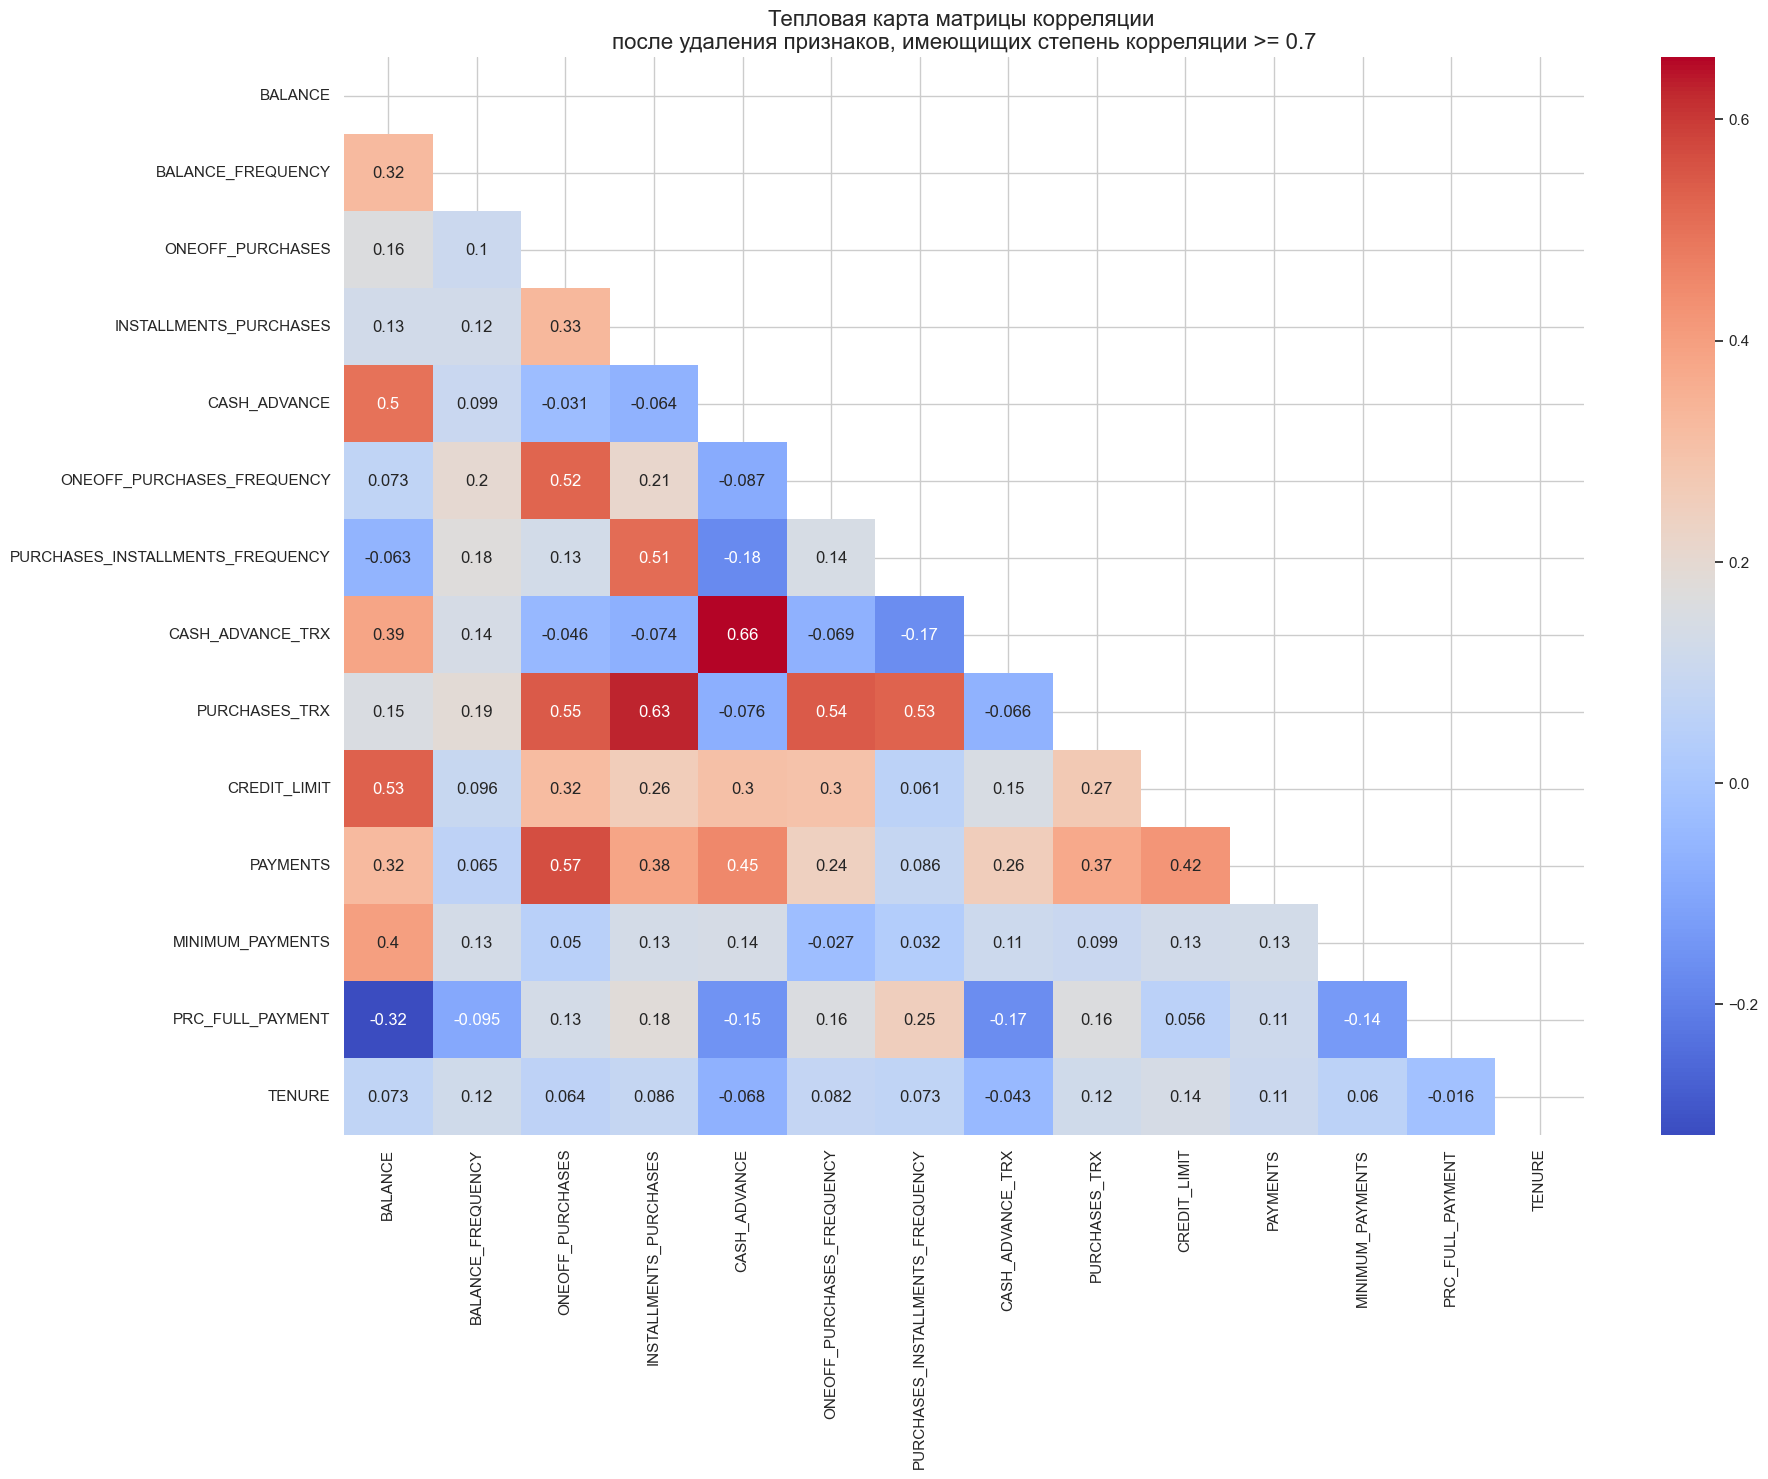

In [20]:
# Повторная проверка матрицы корреляции
corr = df.corr()
mask = np.triu(np.ones_like(corr), k=0)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title(
    f'Тепловая карта матрицы корреляции \nпосле удаления признаков, имеющищих степень корреляции >= {lim_corr_coeff}',
    fontsize=16)
plt.show()

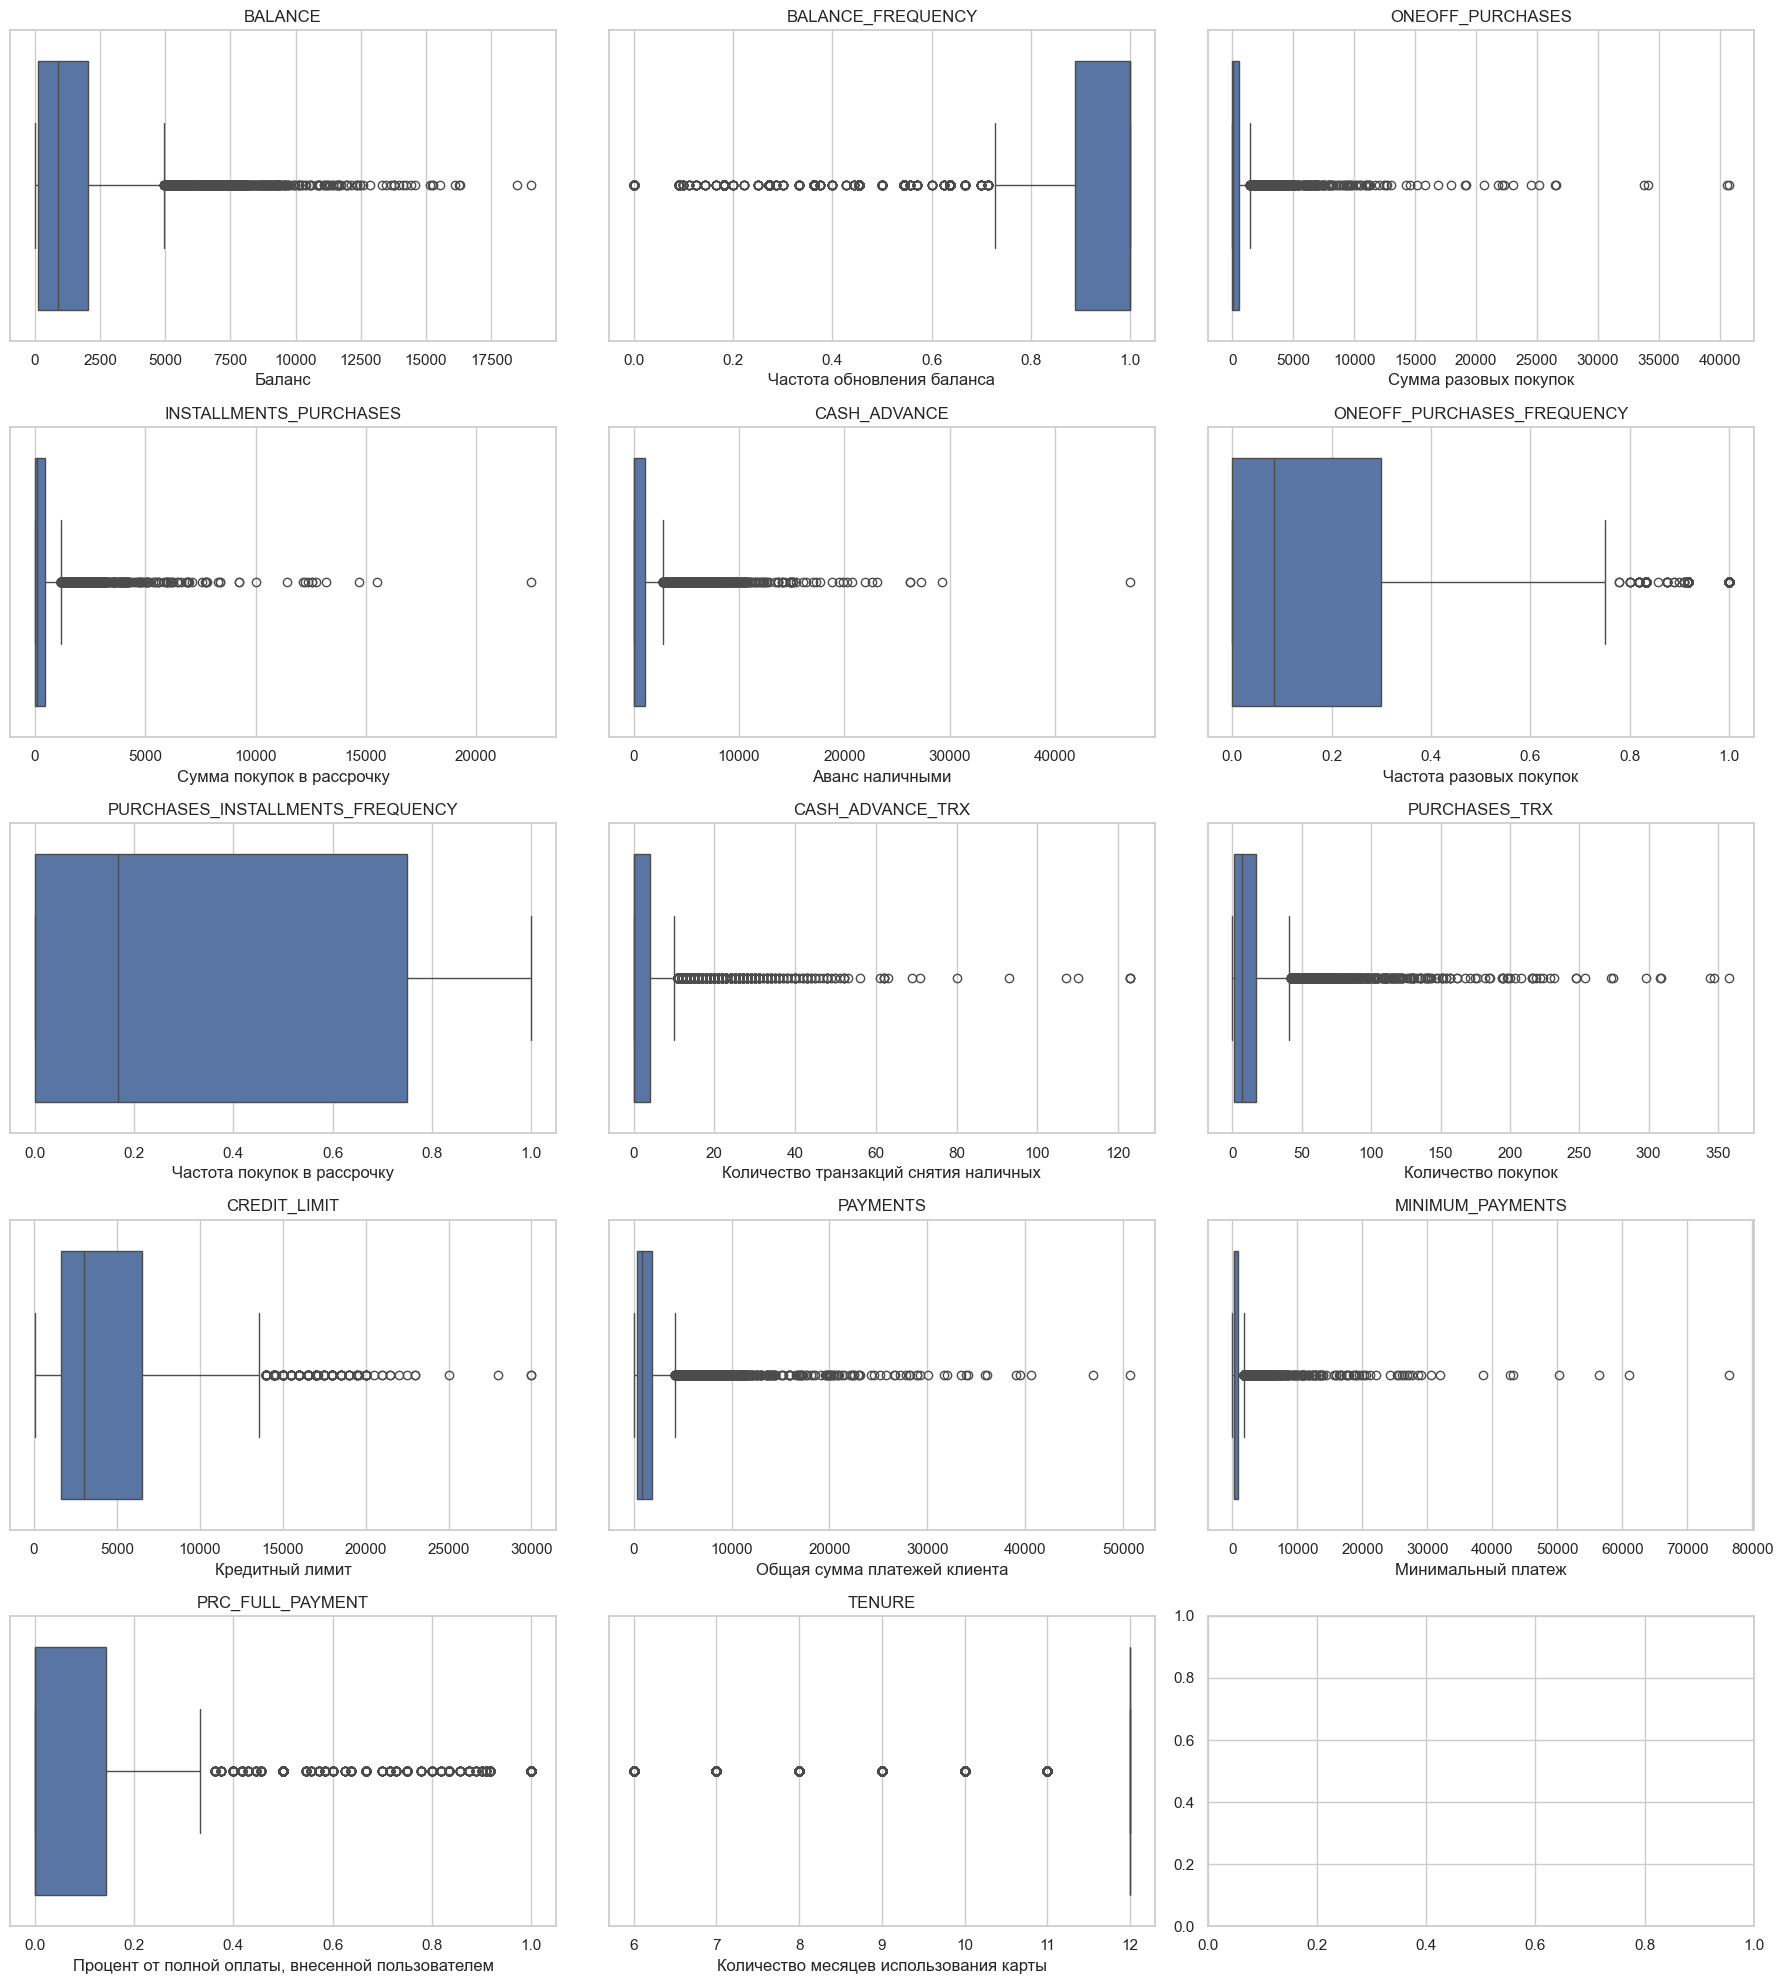

In [21]:
# Выбросы
boxplot_fig, box_axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
box_axes = box_axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=box_axes[i])
    box_axes[i].set_title(col)
    box_axes[i].set_xlabel(num_cols_ru.get(col))

plt.tight_layout()

In [22]:
# Чтобы исключить выбросы (аномалии) из датасета перед кластеризацией, можно один из самых простых и эффективных — Isolation Forest (он хорошо работает с многомерными данными и не требует стандартизации входа).

In [23]:
from sklearn.ensemble import IsolationForest

# Обучу модель
ilf = IsolationForest(contamination=0.01, random_state=42)
outliers = ilf.fit_predict(df)  # -1 = выброс, 1 = нормальный

# Отфильтрую нормальные данные
df = df[outliers == 1]


In [24]:
# Масштабирую признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [25]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [26]:
# Для оценки кластеризации
def evaluate_clustering(X, labels, name):
    if len(set(labels)) > 1 and -1 not in labels:
        score = silhouette_score(X, labels)
    elif len(set(labels)) > 2:  # если есть -1 (DBSCAN), игнорируем шум
        mask = labels != -1
        score = silhouette_score(X[mask], labels[mask])
    else:
        score = -1
    return (name, len(set(labels)), score)

n_clusters = 5

X = df.copy()

# Метки кластеров
labels_list = []

# K-Means (с 5 кластерами)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Agglomerative
agg = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg.fit_predict(X)

# Gaussian Mixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)

# Birch
birch = Birch(n_clusters=n_clusters)
birch_labels = birch.fit_predict(X)

# Оценка
results = [
    evaluate_clustering(X.values, kmeans_labels, "KMeans"),
    evaluate_clustering(X.values, dbscan_labels, "DBSCAN"),
    evaluate_clustering(X.values, agg_labels, "Agglomerative"),
    evaluate_clustering(X.values, gmm_labels, "GMM"),
    evaluate_clustering(X.values, spectral_labels, "Spectral"),
    evaluate_clustering(X.values, spectral_labels, "Birch"),
]

clustering_algorithms = {
    'KMeans': kmeans,
    'Agglomerative': agg,
    'DBSCAN': dbscan,
    'GaussianMixture': gmm,
    'Spectral': spectral,
    'Birch': birch
}

In [27]:
results

[('KMeans', 5, 0.17354386851860934),
 ('DBSCAN', 3, 0.6513730140015291),
 ('Agglomerative', 5, 0.13981452001073227),
 ('GMM', 5, 0.022338222479780807),
 ('Spectral', 5, 0.14443891659116465),
 ('Birch', 5, 0.14443891659116465)]

In [28]:
# Визуализация сравнения метрик между собой
metrics_df = pd.DataFrame.from_records(results, columns=['Модель','Количество кластеров','Силуэтный коэффициент'])


In [29]:
metrics_df

,Модель,Количество кластеров,Силуэтный коэффициент
0,KMeans,5,0.173544
1,DBSCAN,3,0.651373
2,Agglomerative,5,0.139815
3,GMM,5,0.022338
4,Spectral,5,0.144439
5,Birch,5,0.144439


<Figure size 1200x600 with 0 Axes>

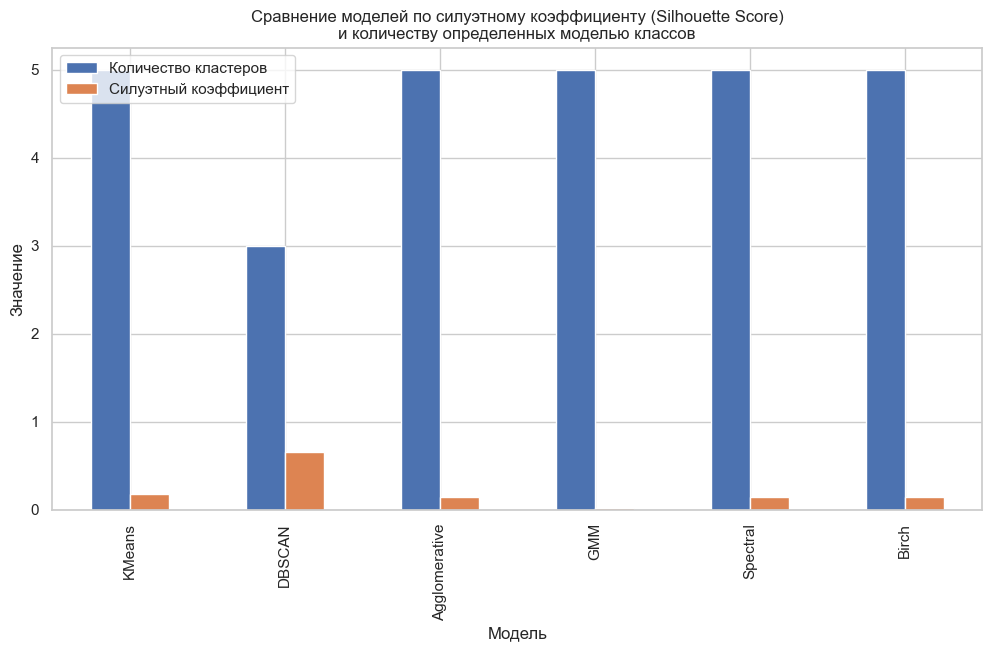

In [30]:
# Установка индекса для удобства
try:
    metrics_df.set_index('Модель', inplace=True)
except:
    pass

# Построение диаграммы
plt.figure(figsize=(12, 6))

# Построение графика
ax = metrics_df.plot(kind='bar', secondary_y='R2', figsize=(12, 6))

# Подпись осей
ax.set_ylabel('Метрики')
ax.set_xlabel('Модель')

# Настройка заголовков и меток
plt.title('Сравнение моделей по cилуэтному коэффициенту (Silhouette Score)\n'
          'и количеству определенных моделью классов')
plt.ylabel('Значение')

plt.grid()

plt.show()

In [31]:
# Большинство из выбранных алгоритмов определили 5 кластеров
# DBSCAN: Показывает результат с метрикой 0.651 определяет 3 класса. DBSCAN хорошо работает с данными, имеющими шум и неравномерную плотность, что может объяснять его высокую оценку.
# KMeans: С результатом 0.174 показывает среднюю эффективность. Этот алгоритм может быть чувствителен к выбросам и требует предварительного задания числа кластеров, что может негативно сказаться на его производительности в некоторых случаях.

# Birch: С метрикой 0.211, Birch показывает результаты лучше, чем KMeans и Agglomerative, но хуже, чем DBSCAN. Birch хорошо подходит для больших наборов данных и может быть полезен в ситуациях, когда данные имеют иерархическую структуру.

# Agglomerative: С результатом 0.140, этот алгоритм показывает низкую эффективность по сравнению с другими. Он может быть менее подходящим для данной задачи, возможно, из-за своей чувствительности к выбору расстояния и количества кластеров.

# GMM (Gaussian Mixture Model): С метрикой 0.022, GMM показывает наихудший результат

In [32]:
# Получение меток кластеров
labels_list = []
for name, model in clustering_algorithms.items():
    labels = model.fit_predict(df)
    # DBSCAN может давать -1 (выбросы) — не будем учитываем их в со-ассоциации
    labels_list.append(np.array(labels))

In [33]:
labels_all = np.vstack(labels_list)
n_models, n_samples = labels_all.shape

In [34]:
# Построение Co-association matrix
coassoc_matrix = np.zeros((n_samples, n_samples))

for labels in labels_all:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j] and labels[i] != -1:
                coassoc_matrix[i, j] += 1

In [35]:
coassoc_matrix /= n_models  # нормализация

In [36]:
# Кластеризация по матрице со-ассоциаций — это метод, который используется для группировки объектов на основе их взаимосвязей. Этот подход применяется в задачах, связанных с анализом данных, таких как рекомендательные системы, где важно учитывать связи между элементами.

distance_matrix = 1 - coassoc_matrix
agglo_final = AgglomerativeClustering(n_clusters=5,  linkage='average')
ensemble_labels = agglo_final.fit_predict(distance_matrix)

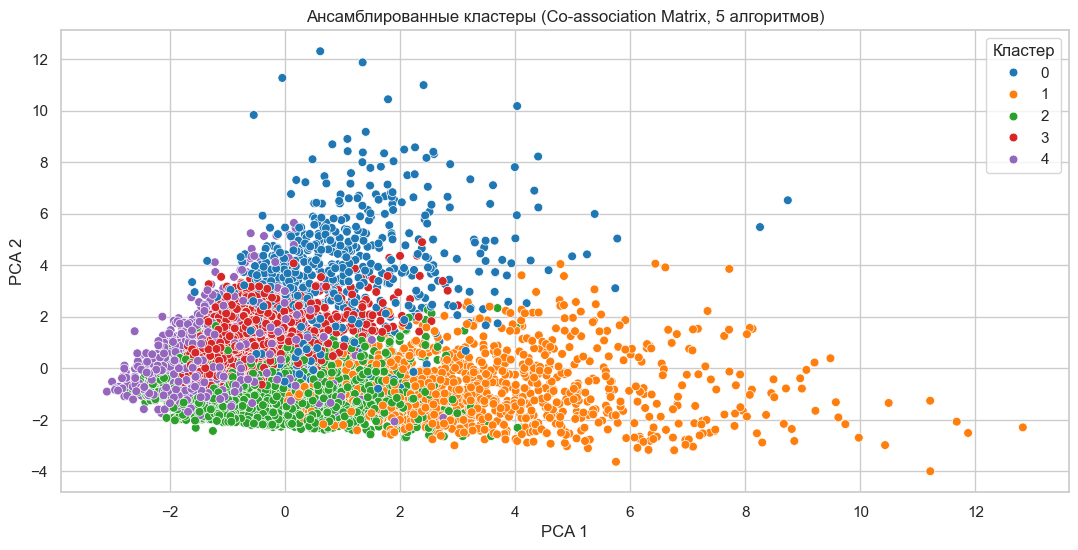

In [37]:
# Визуализация ансамблирвания
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.figure(figsize=(13, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=ensemble_labels, palette='tab10', s=40)
plt.title("Ансамблированные кластеры (Co-association Matrix, 5 алгоритмов)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.show()